# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("iris.csv")
iris = iris.drop(['Unnamed: 0'],axis=1)
iris.head(30)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [45]:
iris = iris.replace('setosa',0)
iris = iris.replace('versicolor',1)
iris = iris.replace('verginica',2)

/var/folders/nf/r4jgw26163j0xgqlgstm67r80000gn/T/ipykernel_52168/1764547724.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  iris = iris.replace('verginica',2)


In [47]:
print(iris['species'].value_counts())

species
0    50
2    50
1    50
Name: count, dtype: int64


In [48]:

x = iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris['species']

In [49]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0)

In [50]:
X_train, y_train

(     sepal_length  sepal_width  petal_length  petal_width
 137           6.4          3.1           5.5          1.8
 84            5.4          3.0           4.5          1.5
 27            5.2          3.5           1.5          0.2
 127           6.1          3.0           4.9          1.8
 132           6.4          2.8           5.6          2.2
 ..            ...          ...           ...          ...
 9             4.9          3.1           1.5          0.1
 103           6.3          2.9           5.6          1.8
 67            5.8          2.7           4.1          1.0
 117           7.7          3.8           6.7          2.2
 47            4.6          3.2           1.4          0.2
 
 [120 rows x 4 columns],
 137    1
 84     2
 27     0
 127    1
 132    1
       ..
 9      0
 103    1
 67     2
 117    1
 47     0
 Name: species, Length: 120, dtype: int64)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3) # initialization
neigh.fit(X_train, y_train) # training

KNeighborsClassifier(n_neighbors=3)

In [56]:
y_pred

array([1, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 1, 2, 0, 0,
       2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 2,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2,
       2, 1, 2, 0, 0, 0, 1, 2, 1, 0])

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

a_test_all=[]
a_train_all = []
for i in range(1,50,5):
    neigh = KNeighborsClassifier(n_neighbors=i) # initialization
    neigh.fit(X_train, y_train) # training
    y_pred_train = neigh.predict(X_train)
    a1 = accuracy_score(y_train, y_pred_train)
    a_train_all.append(a1)
    y_pred_test = neigh.predict(X_test)
    a2 = accuracy_score(y_test, y_pred_test)
    a_test_all.append(a2)

In [78]:
print(a_test_all)

[1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777, 1.0, 0.9777777777777777]


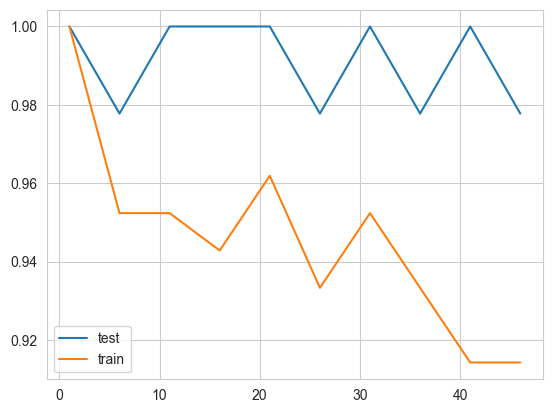

In [80]:
import matplotlib.pyplot as plt
plt.plot(range(1,50,5),a_test_all)
plt.plot(range(1,50,5),a_train_all)
plt.legend(['test','train'])
plt.show()

In [22]:
print(X_train.shape)

(90, 4)


In [26]:
print(y_train.value_counts())

species
setosa        34
versicolor    29
verginica     27
Name: count, dtype: int64


In [27]:
print(y_test.value_counts())

species
verginica     23
versicolor    21
setosa        16
Name: count, dtype: int64


In [5]:
print(x.shape)

(150, 4)


In [6]:
print(y.shape)

(150,)


In [2]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [3]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [4]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

species
setosa        50
verginica     50
versicolor    50
Name: count, dtype: int64

# (3.2) 2-D Scatter Plot

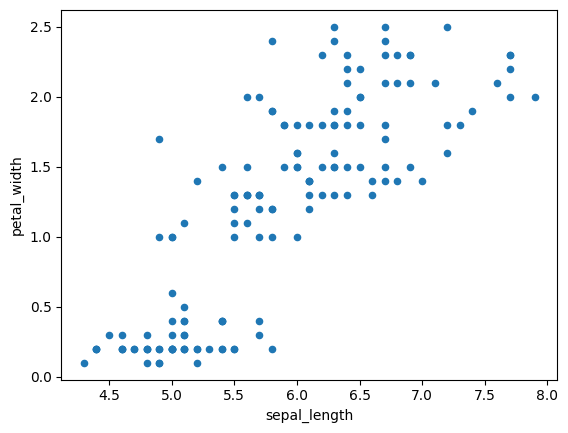

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='petal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

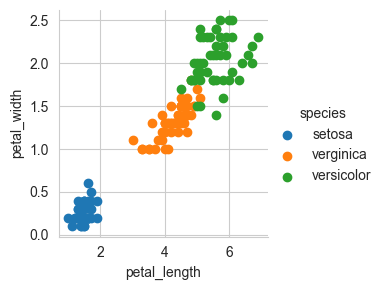

In [8]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=3) \
    .map(plt.scatter, "petal_length", "petal_width") \
.add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

In [7]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()

#  (3.3) Pair-plot

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [31]:
X_train.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

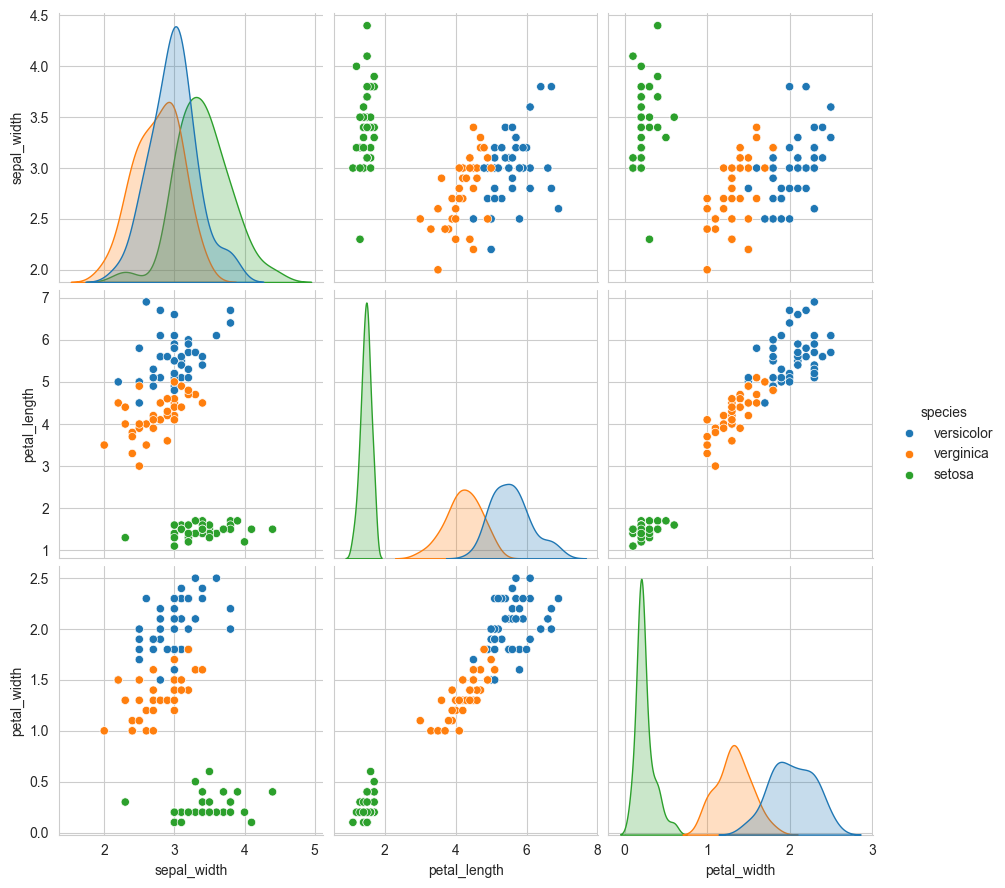

In [36]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can'[5t be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
sns.set_style("whitegrid");
X_train['species'] = y_train

sns.pairplot(X_train[['sepal_width', 'petal_length','petal_width','species']], hue="species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.5) Mean, Variance and Std-dev

In [56]:
iris_setosa = iris[iris['species']=='setosa']
iris_virginica = iris[iris['species']=='verginica']
iris_versicolor = iris[iris['species']=='versicolor']
np.mean(iris_setosa["petal_length"])

1.4620000000000002

In [57]:
iris['species'].value_counts()

setosa        50
verginica     50
versicolor    50
Name: species, dtype: int64

In [58]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.4620000000000002
4.26
5.552

Std-dev:
0.17191858538273286
0.4651881339845204
0.5463478745268441


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [59]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
4.35
5.55

Quantiles:
[1.    1.4   1.5   1.575]
[3.   4.   4.35 4.6 ]
[4.5   5.1   5.55  5.875]

90th Percentiles:
1.7
4.8
6.31

Median Absolute Deviation
0.14826022185056031
0.5189107764769602
0.6671709983275211


# (3.7) Box plot and Whiskers

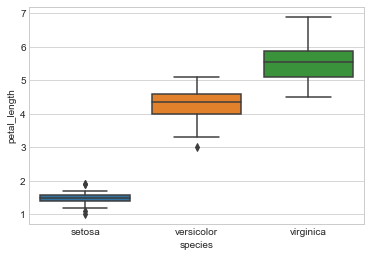

In [ ]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

D:\python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


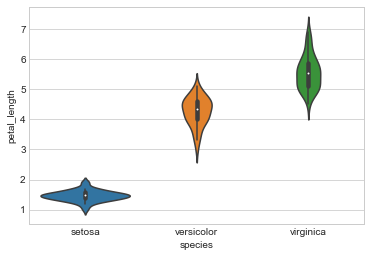

In [ ]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.